In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')


In [4]:
train.shape

(1460, 81)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>],
       [<AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>],
       [<AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHalfBa

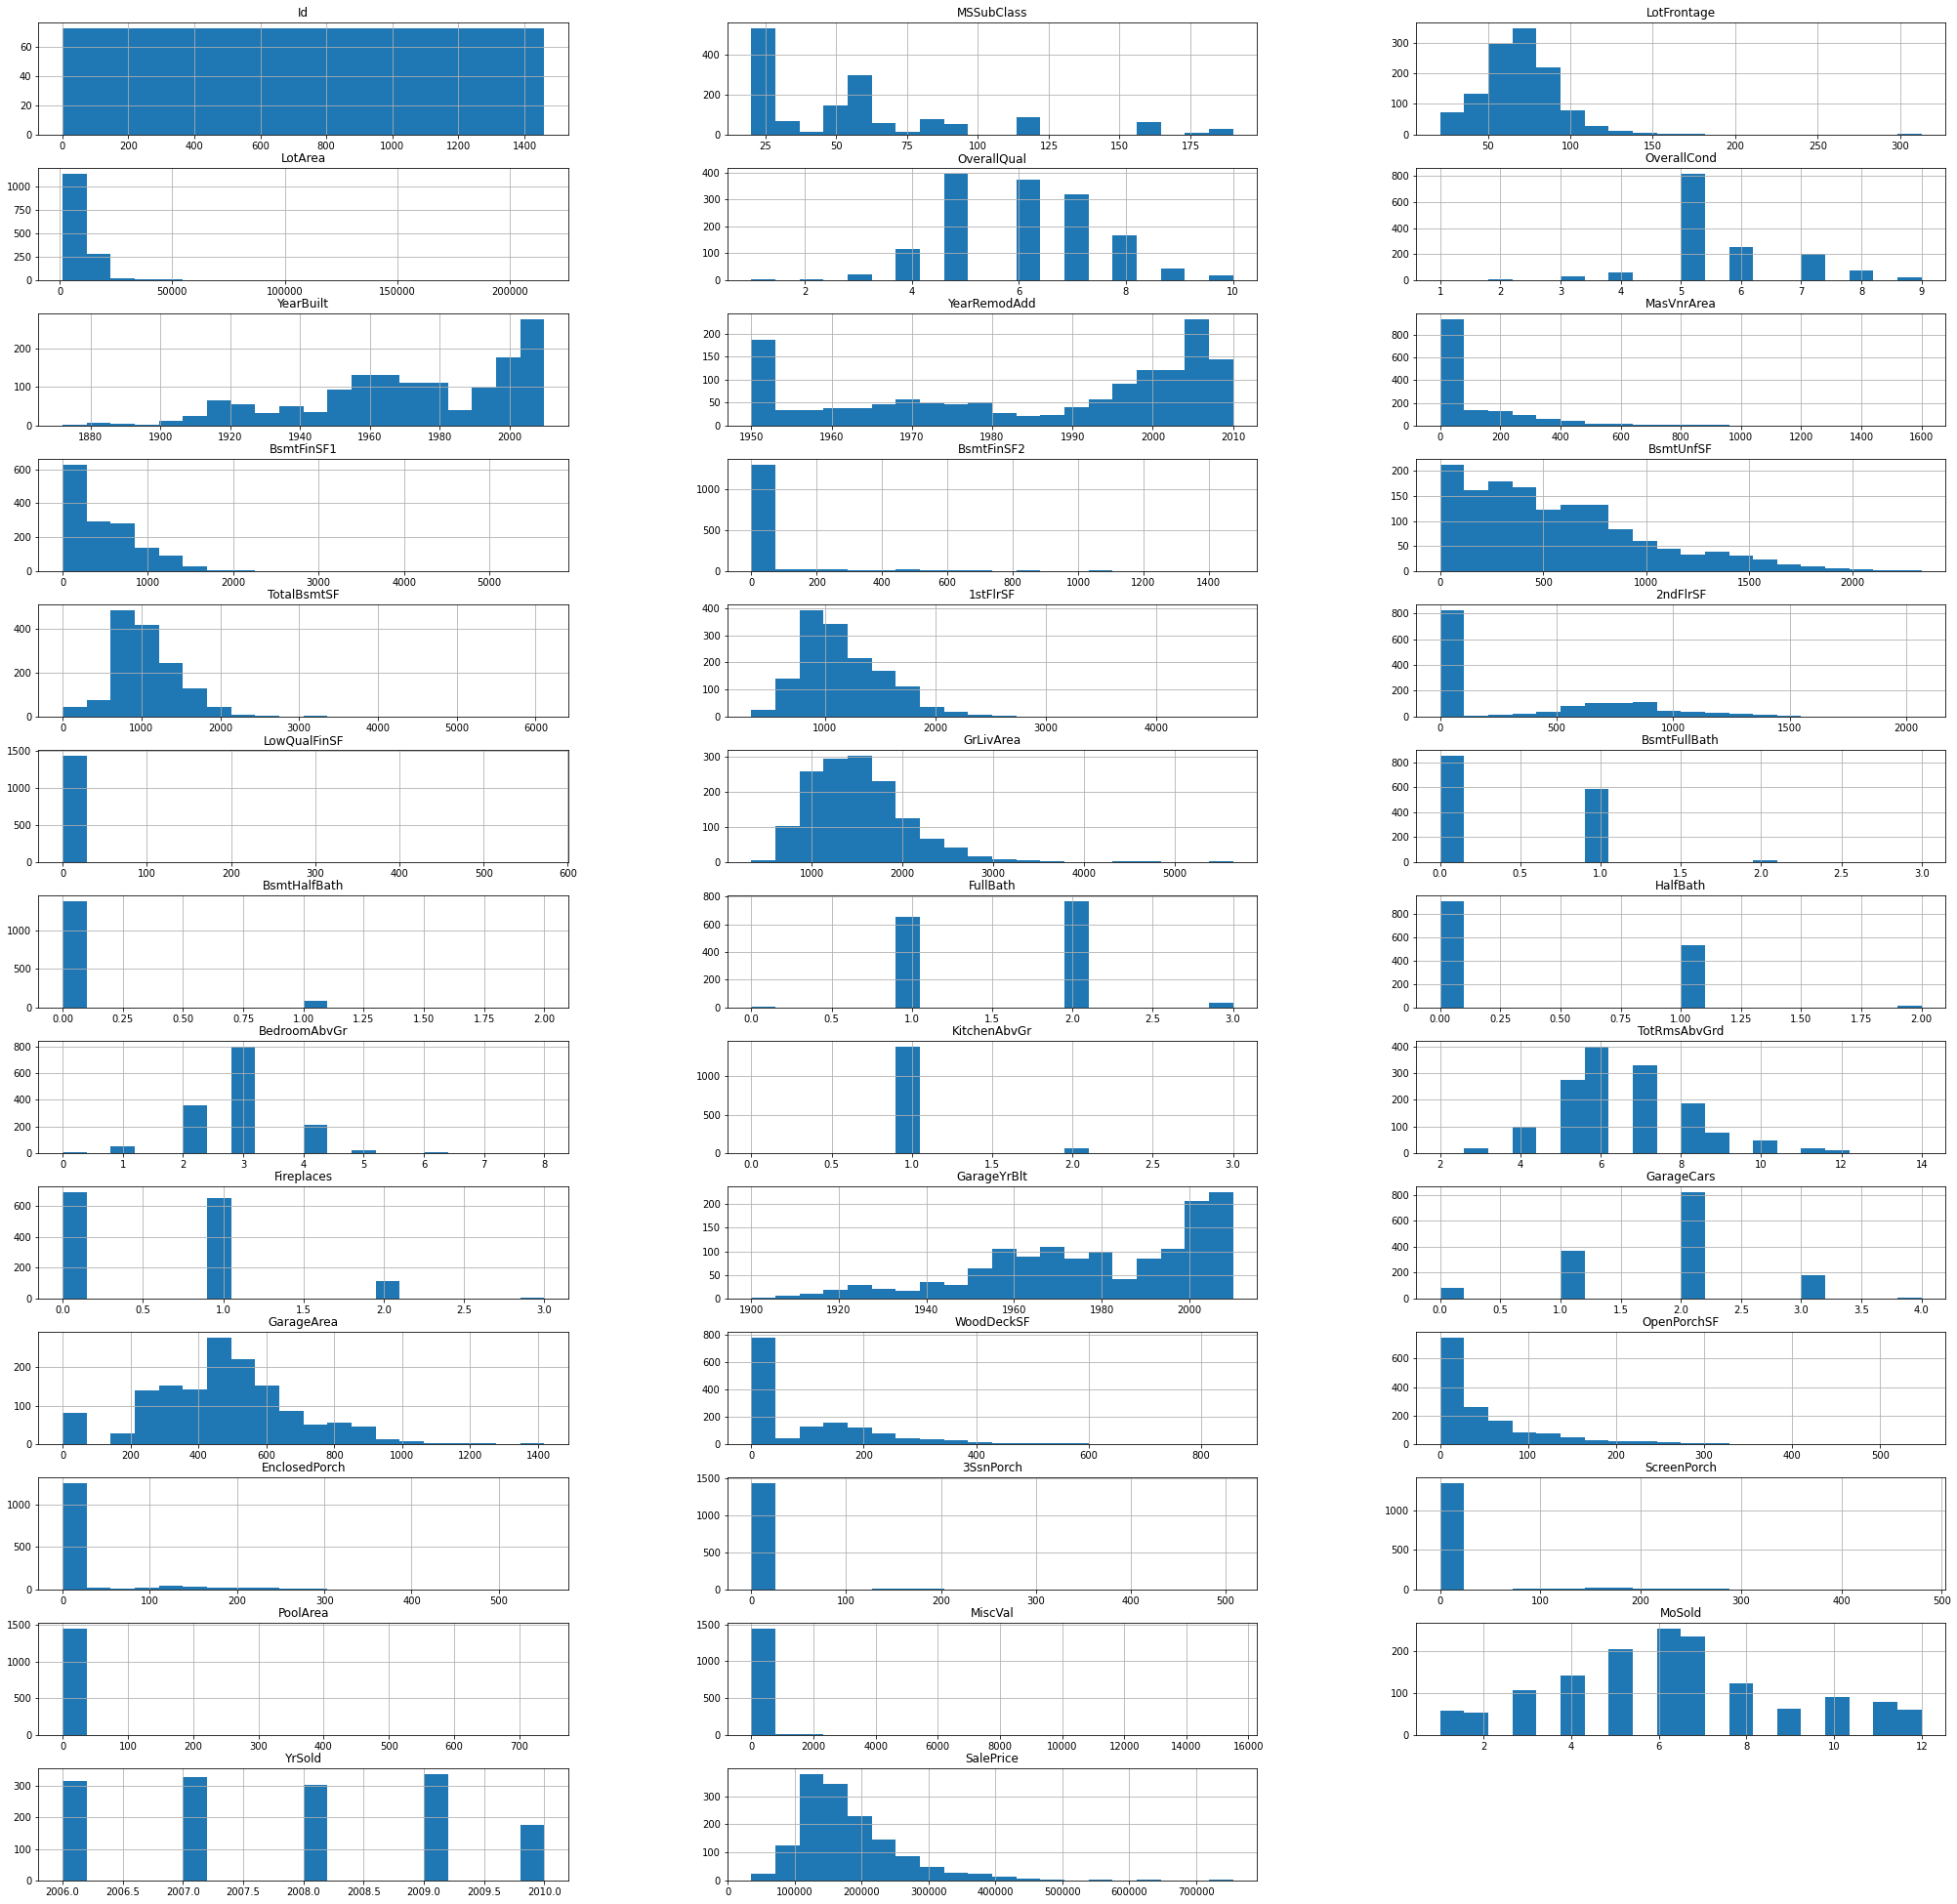

In [7]:
#Plot histogram of numerical variables to validate pandas intuition.
train.hist(figsize=(35,35), layout=(13,3), bins=20)

**Observation**
1. There are two type of numerical variable in this data continuous (like LotFrontage, LotArea, and YearBuilt)
2. and some are discrete (like MSSubClass, OverallQual, OverallCond, BsmtFullBath, and HalfBath etc.)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


Id                  AxesSubplot(0.125,0.808774;0.133621x0.0712264)
MSSubClass       AxesSubplot(0.285345,0.808774;0.133621x0.0712264)
LotFrontage       AxesSubplot(0.44569,0.808774;0.133621x0.0712264)
LotArea          AxesSubplot(0.606034,0.808774;0.133621x0.0712264)
OverallQual      AxesSubplot(0.766379,0.808774;0.133621x0.0712264)
OverallCond         AxesSubplot(0.125,0.723302;0.133621x0.0712264)
YearBuilt        AxesSubplot(0.285345,0.723302;0.133621x0.0712264)
YearRemodAdd      AxesSubplot(0.44569,0.723302;0.133621x0.0712264)
MasVnrArea       AxesSubplot(0.606034,0.723302;0.133621x0.0712264)
BsmtFinSF1       AxesSubplot(0.766379,0.723302;0.133621x0.0712264)
BsmtFinSF2           AxesSubplot(0.125,0.63783;0.133621x0.0712264)
BsmtUnfSF         AxesSubplot(0.285345,0.63783;0.133621x0.0712264)
TotalBsmtSF        AxesSubplot(0.44569,0.63783;0.133621x0.0712264)
1stFlrSF          AxesSubplot(0.606034,0.63783;0.133621x0.0712264)
2ndFlrSF          AxesSubplot(0.766379,0.63783;0.133621x0.0712

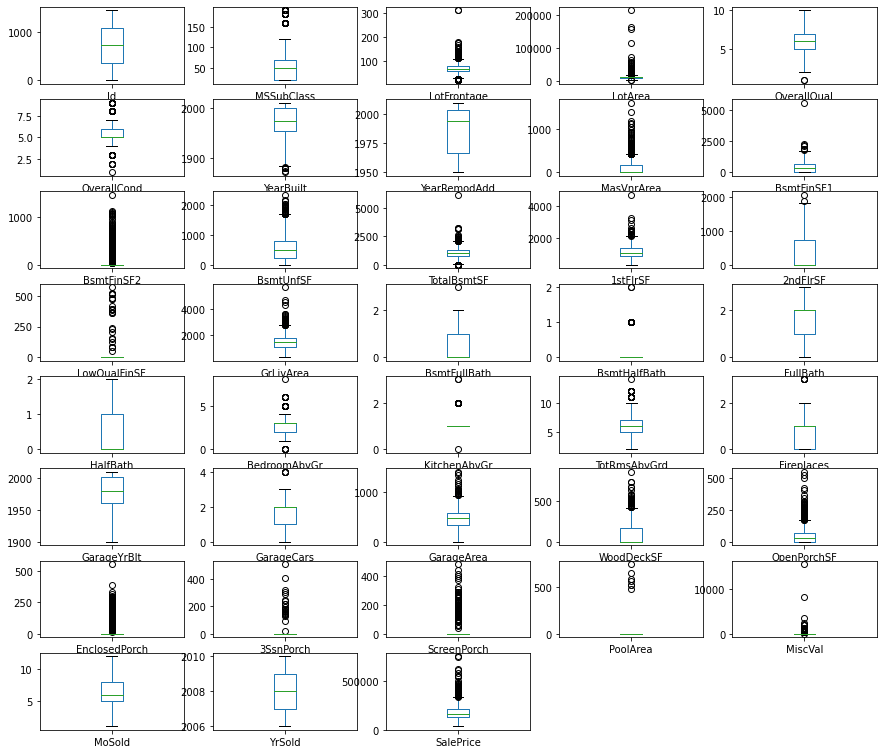

In [8]:
#Now we will check for outliers using boxplot
train.plot(kind="box",subplots=True,layout=(9,5),figsize=(15,15))

In [9]:
#outlier treatment
train.drop(train[train.GrLivArea>4000].index, inplace = True)
train.reset_index(drop = True, inplace = True)

train.drop(train[train.TotalBsmtSF>3000].index, inplace = True)
train.reset_index(drop = True, inplace = True)

train.drop(train[train.YearBuilt<1900].index, inplace = True)
train.reset_index(drop = True, inplace = True)

In [10]:
train.isnull().sum().to_string()

'Id                  0\nMSSubClass          0\nMSZoning            0\nLotFrontage       258\nLotArea             0\nStreet              0\nAlley            1353\nLotShape            0\nLandContour         0\nUtilities           0\nLotConfig           0\nLandSlope           0\nNeighborhood        0\nCondition1          0\nCondition2          0\nBldgType            0\nHouseStyle          0\nOverallQual         0\nOverallCond         0\nYearBuilt           0\nYearRemodAdd        0\nRoofStyle           0\nRoofMatl            0\nExterior1st         0\nExterior2nd         0\nMasVnrType          8\nMasVnrArea          8\nExterQual           0\nExterCond           0\nFoundation          0\nBsmtQual           37\nBsmtCond           37\nBsmtExposure       38\nBsmtFinType1       37\nBsmtFinSF1          0\nBsmtFinType2       37\nBsmtFinSF2          0\nBsmtUnfSF           0\nTotalBsmtSF         0\nHeating             0\nHeatingQC           0\nCentralAir          0\nElectrical          1\n1stFlrSF  

In [11]:
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())

In [12]:
train.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1,inplace=True)

In [13]:
train['GarageFinish']=train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
train['GarageQual']=train['GarageQual'].fillna(train['GarageQual'].mode()[0])
train['GarageCond']=train['GarageCond'].fillna(train['GarageCond'].mode()[0])
train['BsmtCond']=train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
train['BsmtQual']=train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
train['GarageType']=train['GarageType'].fillna(train['GarageType'].mode()[0])
train['GarageYrBlt']=train['GarageYrBlt'].fillna(train['GarageYrBlt'].mode()[0])
train['MasVnrType']=train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mode()[0])
train['BsmtFinType2']=train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])
train['BsmtFinType1']=train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0])
train['Electrical']=train['Electrical'].fillna(train['Electrical'].mode()[0])
train['BsmtExposure']=train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
train['GrLivArea']=train['GrLivArea'].fillna(train['GrLivArea'].mode()[0])
train['TotalBsmtSF']=train['TotalBsmtSF'].fillna(train['TotalBsmtSF'].mode()[0])
train['YearBuilt']=train['YearBuilt'].fillna(train['YearBuilt'].mode()[0])


In [14]:
train.isnull().sum().to_string()

'Id               0\nMSSubClass       0\nMSZoning         0\nLotFrontage      0\nLotArea          0\nStreet           0\nLotShape         0\nLandContour      0\nUtilities        0\nLotConfig        0\nLandSlope        0\nNeighborhood     0\nCondition1       0\nCondition2       0\nBldgType         0\nHouseStyle       0\nOverallQual      0\nOverallCond      0\nYearBuilt        0\nYearRemodAdd     0\nRoofStyle        0\nRoofMatl         0\nExterior1st      0\nExterior2nd      0\nMasVnrType       0\nMasVnrArea       0\nExterQual        0\nExterCond        0\nFoundation       0\nBsmtQual         0\nBsmtCond         0\nBsmtExposure     0\nBsmtFinType1     0\nBsmtFinSF1       0\nBsmtFinType2     0\nBsmtFinSF2       0\nBsmtUnfSF        0\nTotalBsmtSF      0\nHeating          0\nHeatingQC        0\nCentralAir       0\nElectrical       0\n1stFlrSF         0\n2ndFlrSF         0\nLowQualFinSF     0\nGrLivArea        0\nBsmtFullBath     0\nBsmtHalfBath     0\nFullBath         0\nHalfBath         0\

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5]),
 [Text(0, 0.5, 'Id'),
  Text(0, 1.5, 'MSSubClass'),
  Text(0, 2.5, 'LotFrontage'),
  Text(0, 3.5, 'LotArea'),
  Text(0, 4.5, 'OverallQual'),
  Text(0, 5.5, 'OverallCond'),
  Text(0, 6.5, 'YearBuilt'),
  Text(0, 7.5, 'YearRemodAdd'),
  Text(0, 8.5, 'MasVnrArea'),
  Text(0, 9.5, 'BsmtFinSF1'),
  Text(0, 10.5, 'BsmtFinSF2'),
  Text(0, 11.5, 'BsmtUnfSF'),
  Text(0, 12.5, 'TotalBsmtSF'),
  Text(0, 13.5, '1stFlrSF'),
  Text(0, 14.5, '2ndFlrSF'),
  Text(0, 15.5, 'LowQualFinSF'),
  Text(0, 16.5, 'GrLivArea'),
  Text(0, 17.5, 'BsmtFullBath'),
  Text(0, 18.5, 'BsmtHalfBath'),
  Text(0, 19.5, 'FullBath'),
  Text(0, 20.5, 'HalfBath'),
  Text(0, 21.5, 'BedroomAbvGr'),
  Text(0, 22.5, 'KitchenAbvGr'),
  Text(0, 23.5, 'TotRmsAbvGrd'),
  Text(0

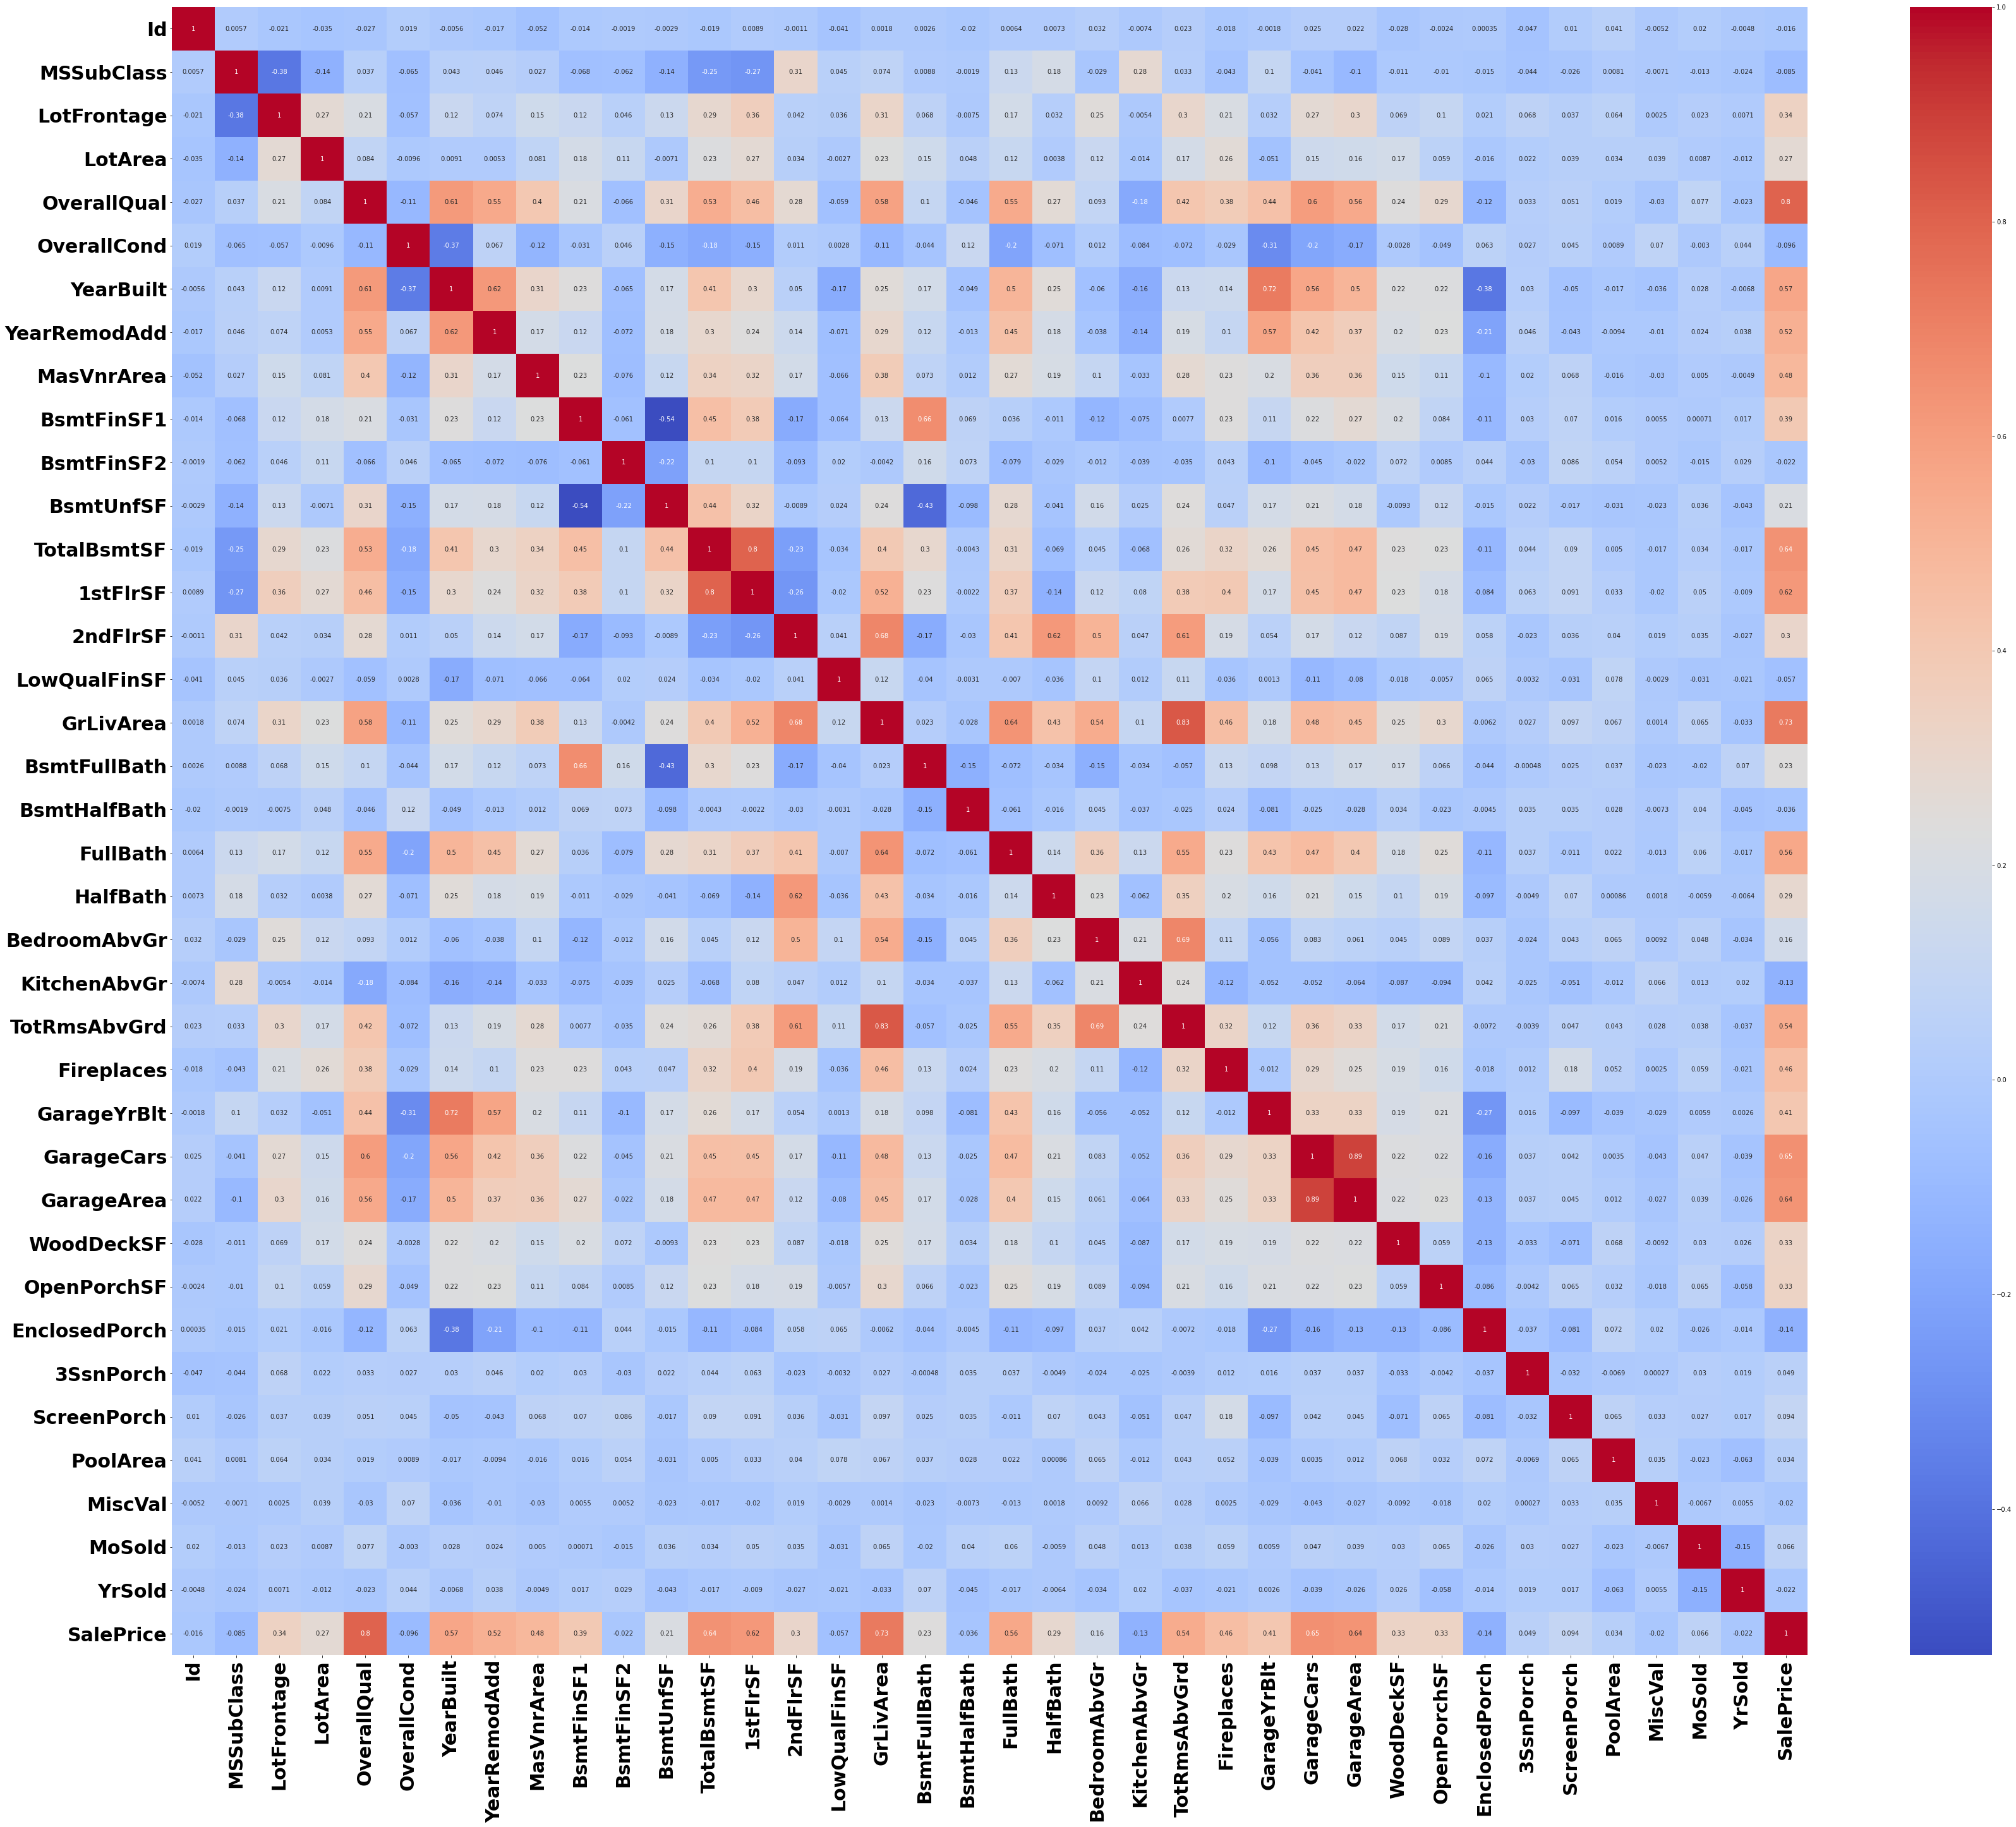

In [15]:
plt.figure(figsize=[58,48])
sns.heatmap(train.corr(), annot = True,cmap = 'coolwarm')
plt.xticks(fontsize=30,weight = 'bold')
plt.yticks(fontsize=30,weight = 'bold')

**Observation**
1. OverallQual, GrLivArea and TotalBsmtSF are strongly correlated with SalePrice
2. GarageCars and GarageArea are also some of the most strongly correlated variables.  the number of cars that fit into the garage is a consequence of the garage area.Therefore, we just need one of these variables in our analysis (we can keep GarageCars since its correlation with SalePrice is higher).

In [16]:
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
test.shape


(1459, 80)

In [17]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [18]:
test.isnull().sum().to_string()

'Id                  0\nMSSubClass          0\nMSZoning            4\nLotFrontage       227\nLotArea             0\nStreet              0\nAlley            1352\nLotShape            0\nLandContour         0\nUtilities           2\nLotConfig           0\nLandSlope           0\nNeighborhood        0\nCondition1          0\nCondition2          0\nBldgType            0\nHouseStyle          0\nOverallQual         0\nOverallCond         0\nYearBuilt           0\nYearRemodAdd        0\nRoofStyle           0\nRoofMatl            0\nExterior1st         1\nExterior2nd         1\nMasVnrType         16\nMasVnrArea         15\nExterQual           0\nExterCond           0\nFoundation          0\nBsmtQual           44\nBsmtCond           45\nBsmtExposure       44\nBsmtFinType1       42\nBsmtFinSF1          1\nBsmtFinType2       42\nBsmtFinSF2          1\nBsmtUnfSF           1\nTotalBsmtSF         1\nHeating             0\nHeatingQC           0\nCentralAir          0\nElectrical          0\n1stFlrSF  

In [19]:
test.skew()

Id                0.000000
MSSubClass        1.346690
LotFrontage       0.661921
LotArea           3.115217
OverallQual       0.181196
OverallCond       0.449165
YearBuilt        -0.587657
YearRemodAdd     -0.399906
MasVnrArea        2.533377
BsmtFinSF1        1.165677
BsmtFinSF2        4.041345
BsmtUnfSF         0.919916
TotalBsmtSF       0.813589
1stFlrSF          1.558195
2ndFlrSF          0.912883
LowQualFinSF     16.167254
GrLivArea         1.130402
BsmtFullBath      0.649698
BsmtHalfBath      3.779866
FullBath          0.295839
HalfBath          0.714728
BedroomAbvGr      0.436623
KitchenAbvGr      4.079055
TotRmsAbvGrd      0.842597
Fireplaces        0.819858
GarageYrBlt      -0.158363
GarageCars       -0.107142
GarageArea        0.300239
WoodDeckSF        2.130760
OpenPorchSF       2.687779
EnclosedPorch     4.669172
3SsnPorch        12.524216
ScreenPorch       3.788244
PoolArea         20.196888
MiscVal          20.075188
MoSold            0.183022
YrSold            0.168986
d

In [20]:
test.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1,inplace=True)

In [21]:
test['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())

In [22]:
test['MasVnrType']=test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])
test['BsmtQual']=test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])
test['BsmtFinType2']=test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])
test['Functional']=test['Functional'].fillna(test['Functional'].mode()[0])
test['GarageFinish']=test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])
test['MasVnrArea']=test['MasVnrArea'].fillna(test['MasVnrArea'].mode()[0])
test['BsmtCond']=test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])
test['BsmtFinSF2']=test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mode()[0])
test['GarageCars']=test['GarageCars'].fillna(test['GarageCars'].mode()[0])
test['MSZoning']=test['MSZoning'].fillna(test['MSZoning'].mode()[0])


In [23]:
test['BsmtExposure']=test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])
test['BsmtUnfSF']=test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mode()[0])
test['BsmtFullBath']=test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0])
test['GarageArea']=test['GarageArea'].fillna(test['GarageArea'].mode()[0])
test['Exterior1st']=test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['BsmtFinType1']=test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0])
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mode()[0])
test['BsmtHalfBath']=test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0])
test['KitchenQual']=test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['GarageType']=test['GarageType'].fillna(test['GarageType'].mode()[0])

In [24]:
test['GarageQual']=test['GarageQual'].fillna(test['GarageQual'].mode()[0])
test['SaleType']=test['SaleType'].fillna(test['SaleType'].mode()[0])
test['Utilities']=test['Utilities'].fillna(test['Utilities'].mode()[0])
test['Exterior2nd']=test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mode()[0])
test['GarageYrBlt']=test['GarageYrBlt'].fillna(test['GarageYrBlt'].mode()[0])
test['GarageCond']=test['GarageCond'].fillna(test['GarageCond'].mode()[0])


In [25]:
test.isnull().sum().to_string()

'Id                0\nMSSubClass        0\nMSZoning          0\nLotFrontage      21\nLotArea           0\nStreet            0\nLotShape          0\nLandContour       0\nUtilities         0\nLotConfig         0\nLandSlope         0\nNeighborhood      0\nCondition1        0\nCondition2        0\nBldgType          0\nHouseStyle        0\nOverallQual       0\nOverallCond       0\nYearBuilt         0\nYearRemodAdd      0\nRoofStyle         0\nRoofMatl          0\nExterior1st       0\nExterior2nd       0\nMasVnrType        0\nMasVnrArea        0\nExterQual         0\nExterCond         0\nFoundation        0\nBsmtQual          0\nBsmtCond          0\nBsmtExposure      0\nBsmtFinType1      0\nBsmtFinSF1        0\nBsmtFinType2      0\nBsmtFinSF2        0\nBsmtUnfSF         0\nTotalBsmtSF       0\nHeating           0\nHeatingQC         0\nCentralAir        0\nElectrical        0\n1stFlrSF          0\n2ndFlrSF          0\nLowQualFinSF      0\nGrLivArea         0\nBsmtFullBath      0\nBsmtHalfBath

In [26]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [27]:
print (train.enc_street.value_counts())

1    1432
0       6
Name: enc_street, dtype: int64


In [28]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()
X = data.drop(['SalePrice', 'Id'], axis=1)
y = np.log(train.SalePrice)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=42, test_size=.2)
from sklearn.metrics import mean_squared_error

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)
y_predict_lr = lr_model.predict(X_test)

print ('RMSE is:', mean_squared_error(y_test, y_predict_lr))

RMSE is: 0.020699011088120303


In [31]:
from sklearn.tree import DecisionTreeRegressor
dtr =  DecisionTreeRegressor()
dtr_model = dtr.fit(X_train, y_train)
y_predict_dtr = dtr_model.predict(X_test)

print ('RMSE is:', mean_squared_error(y_test, y_predict_dtr))

RMSE is: 0.04317495334232227


In [32]:
from sklearn.neighbors import KNeighborsRegressor
knr =  KNeighborsRegressor()
knr_model = knr.fit(X_train, y_train)
y_predict_knr = knr_model.predict(X_test)

print ('RMSE is:', mean_squared_error(y_test, y_predict_knr))

RMSE is: 0.05311727895599225


In [33]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr_model = rfr.fit(X_train, y_train)
y_predict_rfr = rfr_model.predict(X_test)

print ('RMSE is:', mean_squared_error(y_test, y_predict_rfr))

RMSE is: 0.025671111494145964


In [34]:
#Linear Regression gave us the least RMSE value

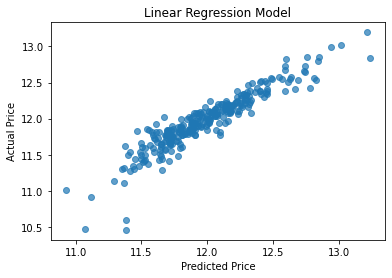

In [35]:
actual_values = y_test
plt.scatter(y_predict_lr, actual_values, alpha = .7)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [36]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [37]:
feats = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()

In [38]:
predictions = lr.predict(feats)
final_predictions = np.exp(predictions)

In [39]:
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,121827.607882
1,1462,123834.317614
2,1463,171973.745880
3,1464,193131.041194
4,1465,186940.605860


In [40]:
submission.to_csv('submission1.csv', index=False)